In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# 1. Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên
df = pd.read_csv('./Tweets.csv/Tweets.csv')
print("10 dòng dữ liệu đầu tiên:")
print(df.head(10))

10 dòng dữ liệu đầu tiên:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   
5  570300767074181121          negative                        1.0000   
6  570300616901320704          positive                        0.6745   
7  570300248553349120           neutral                        0.6340   
8  570299953286942721          positive                        0.6559   
9  570295459631263746          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [5]:
# 2. Tìm hiểu thông tin về dữ liệu

# a. Số lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay
print("\nSố lượng phản hồi của mỗi hãng máy bay:")
print(df['airline'].value_counts())



Số lượng phản hồi của mỗi hãng máy bay:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [6]:
print("\nSố lượng phản hồi mỗi mức độ của từng hãng máy bay:")
print(df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0))


Số lượng phản hồi mỗi mức độ của từng hãng máy bay:
airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


In [13]:
timezone_mapping = {
    'Eastern Time (US & Canada)': -5,
    'Central Time (US & Canada)': -6,
    'Mountain Time (US & Canada)': -7,
    'Pacific Time (US & Canada)': -8,
    # Thêm các múi giờ khác nếu có
}

def get_utc_offset(timezone_str):
    return timezone_mapping.get(timezone_str, None)  # Trả về None nếu không tìm thấy

# Tạo cột mới 'timezone_offset'
df['timezone_offset'] = df['user_timezone'].apply(get_utc_offset)

In [14]:
# Tính các tham số thống kê cho các thuộc tính độ tin cậy và timezone_offset
stats_confidence = df.groupby(['airline', 'airline_sentiment']).agg({
    'airline_sentiment_confidence': ['mean', 'std'],
    'negativereason_confidence': ['mean', 'std'],
    'timezone_offset': ['mean', 'std', 'median']
}).reset_index()

print("\nTham số thống kê cho mỗi mức độ phản hồi của từng hãng máy bay:")
print(stats_confidence)



Tham số thống kê cho mỗi mức độ phản hồi của từng hãng máy bay:
           airline airline_sentiment airline_sentiment_confidence            \
                                                             mean       std   
0         American          negative                     0.944955  0.124992   
1         American           neutral                     0.825938  0.186387   
2         American          positive                     0.882302  0.169425   
3            Delta          negative                     0.902202  0.162831   
4            Delta           neutral                     0.829264  0.185266   
5            Delta          positive                     0.867111  0.177139   
6        Southwest          negative                     0.920533  0.147741   
7        Southwest           neutral                     0.826109  0.186759   
8        Southwest          positive                     0.886105  0.173846   
9       US Airways          negative                     0.945714 

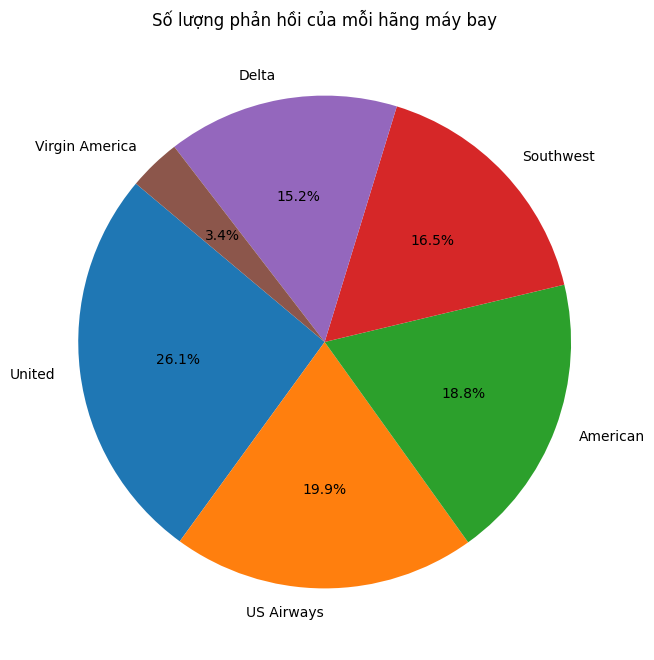

In [8]:
# 3. Đồ thị hóa dữ liệu

# a. Số lượng phản hồi của mỗi hãng máy bay bằng đồ thị tròn
plt.figure(figsize=(8,8))
df['airline'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Số lượng phản hồi của mỗi hãng máy bay')
plt.ylabel('')
plt.show()

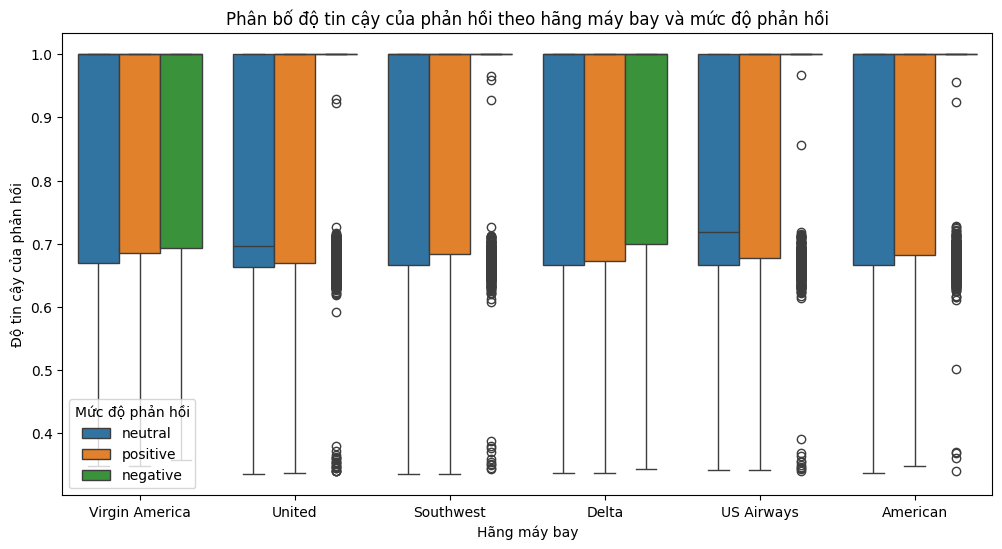

In [9]:
# b. Box plot cho airline_sentiment_confidence theo hãng máy bay và mức độ phản hồi
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', hue='airline_sentiment', data=df)
plt.title('Phân bố độ tin cậy của phản hồi theo hãng máy bay và mức độ phản hồi')
plt.xlabel('Hãng máy bay')
plt.ylabel('Độ tin cậy của phản hồi')
plt.legend(title='Mức độ phản hồi')
plt.show()


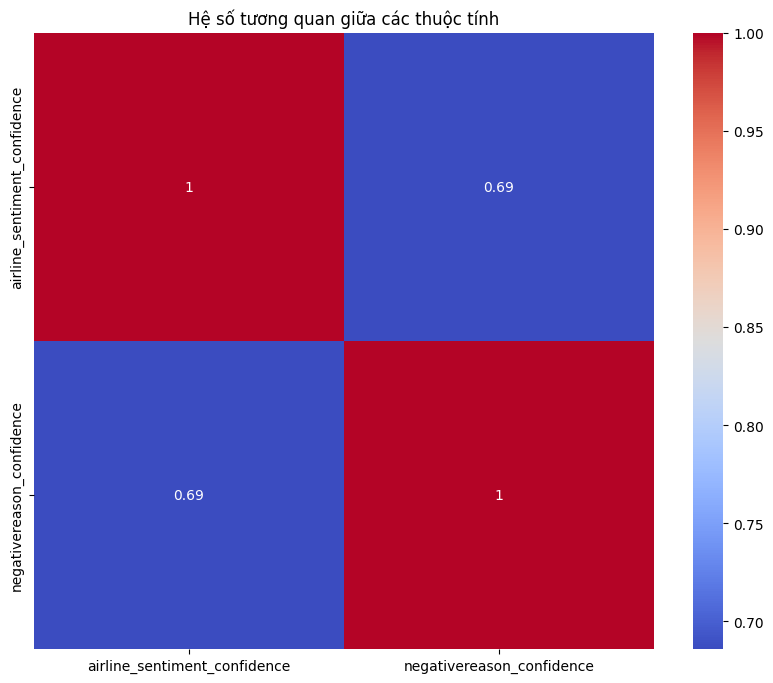

In [11]:
# c. Đồ thị biểu diễn sự tương quan giữa các thuộc tính
plt.figure(figsize=(10,8))
correlation = df[['airline_sentiment_confidence', 'negativereason_confidence']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Hệ số tương quan giữa các thuộc tính')
plt.show()

In [12]:
# 4. Tính xác suất cho phân phối chuẩn

# Tham số phân phối
mu = 20      # Kỳ vọng
sigma = 0.2  # Độ lệch chuẩn

# a. Xác suất để đường kính nhỏ hơn 20.3mm
prob_a = norm.cdf(20.3, mu, sigma)
print(f"\n4a. Xác suất để đường kính nhỏ hơn 20.3mm: {prob_a:.4f}")


4a. Xác suất để đường kính nhỏ hơn 20.3mm: 0.9332


In [13]:
# b. Xác suất để đường kính trong khoảng 19.9mm đến 20.3mm
prob_b = norm.cdf(20.3, mu, sigma) - norm.cdf(19.9, mu, sigma)
print(f"4b. Xác suất để đường kính trong khoảng 19.9mm đến 20.3mm: {prob_b:.4f}")

4b. Xác suất để đường kính trong khoảng 19.9mm đến 20.3mm: 0.6247


In [14]:

# c. Xác suất để đường kính sai khác với kỳ vọng không quá 0.3mm
# Tức là trong khoảng [19.7, 20.3]
prob_c = norm.cdf(20.3, mu, sigma) - norm.cdf(19.7, mu, sigma)
print(f"4c. Xác suất để đường kính sai khác với kỳ vọng không quá 0.3mm: {prob_c:.4f}")

4c. Xác suất để đường kính sai khác với kỳ vọng không quá 0.3mm: 0.8664
